# ROI verification

In [1]:
from prep_test_data import *
from pathlib import Path
import json
import torch
from matplotlib import pyplot as plt
import shutil
import numpy as np
import cv2
import csv

In [2]:
TEST_DATA_PATH = Path(f'/mnt/Media/bernardo/DSL_test_data')

In [3]:
roi_file_path = list((Path.cwd().parent / "ROI").glob("*.txt"))[2] # --> label final
roi_file_path

PosixPath('/mnt/Media/bernardo/Documents/PhD/Courses/Deep Structured Learning/code/DSLproject/ROI/5_ROI.txt')

In [5]:
def roi_rectangle(img_path, roi):
    img = cv2.imread(str(img_path))
    top_left = (int(roi[4]), int(roi[3]))
    bottom_right = (int(roi[5]), int(roi[2]))
    print(f"top_left: {top_left}")    
    print(f"bottom_right: {bottom_right}")
    img = cv2.rectangle(img, top_left, bottom_right, (255,0,0), 2)
    plt.imshow(img)
    cv2.imshow("roi-test", img)
    cv2.waitKey()
    cv2.destroyAllWindows()
    return top_left, bottom_right, img

top_left: (1847, 112)
bottom_right: (2020, 281)
top_left: (1864, 119)
bottom_right: (2023, 280)
top_left: (1867, 130)
bottom_right: (2020, 293)
top_left: (1880, 116)
bottom_right: (2013, 283)
top_left: (1868, 102)
bottom_right: (2001, 268)
top_left: (1842, 110)
bottom_right: (1985, 276)
top_left: (1827, 135)
bottom_right: (1971, 297)
top_left: (1817, 136)
bottom_right: (1966, 295)
top_left: (1803, 105)
bottom_right: (1976, 266)
top_left: (1831, 105)
bottom_right: (1987, 267)
top_left: (1842, 114)
bottom_right: (1998, 279)
top_left: (1846, 122)
bottom_right: (2006, 277)
top_left: (1858, 104)
bottom_right: (2011, 260)
top_left: (1860, 105)
bottom_right: (2013, 278)
top_left: (1855, 119)
bottom_right: (1999, 289)
top_left: (1849, 120)
bottom_right: (1993, 284)
top_left: (1838, 100)
bottom_right: (1992, 272)
top_left: (1834, 111)
bottom_right: (1990, 278)
top_left: (1837, 130)
bottom_right: (1990, 292)
top_left: (1834, 117)
bottom_right: (1992, 282)
top_left: (1844, 107)
bottom_right: (199

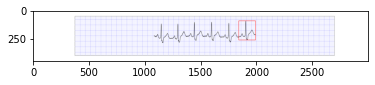

In [6]:
with open(roi_file_path) as rois:
    rois_reader = csv.reader(rois, delimiter='\t')
    j = 0
    for i, roi in enumerate(rois_reader):
        if i != 0:
            img_path = TEST_DATA_PATH / roi[6] / f"{roi[1]}_{roi[0]}.png"
            if img_path.is_file():
                j += 1
                roi_rectangle(img_path, roi)
                if j == 50:
                    break